In [1]:
import pandas as pd
import datetime as dt
import numpy as np


In [2]:
df = pd.read_excel('E:\College\TY\Edi\Sample1.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
50915,540567,84813,SET OF 4 DIAMOND NAPKIN RINGS,8,2011-01-10 11:09:00,3.95,16850.0,United Kingdom
50916,540568,22413,METAL SIGN TAKE IT OR LEAVE IT,1,2011-01-10 11:22:00,2.95,15039.0,United Kingdom
50917,540568,22423,REGENCY CAKESTAND 3 TIER,16,2011-01-10 11:22:00,10.95,15039.0,United Kingdom
50918,540568,22222,CAKE PLATE LOVEBIRD WHITE,12,2011-01-10 11:22:00,1.95,15039.0,United Kingdom


In [3]:
df.nunique()

InvoiceNo      2365
StockCode      2884
Description    2822
Quantity        217
InvoiceDate    2088
UnitPrice       316
CustomerID     1049
Country          24
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 8 columns):
InvoiceNo      50920 non-null object
StockCode      50920 non-null object
Description    50776 non-null object
Quantity       50920 non-null int64
InvoiceDate    50920 non-null datetime64[ns]
UnitPrice      50920 non-null float64
CustomerID     32518 non-null float64
Country        50920 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [5]:
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

df.drop(['InvoiceDate'], axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [6]:
print(df.loc[154,'InvoiceNo'])
print(str(df.loc[154,'InvoiceNo']).isalnum())   

C536383
True


In [7]:
for i in range(df.shape[0]):
    if(str(df.loc[i,'InvoiceNo']).isnumeric()):
       df.loc[i,'CancelledOrder'] = None
       df.loc[i,'Invoice_No'] =  df.loc[i,'InvoiceNo']
    elif(str(df.loc[i,'InvoiceNo']).isalnum()):
       df.loc[i,'CancelledOrder'] = str(df.loc[i,'InvoiceNo'])[0]
       df.loc[i,'Invoice_No'] = str(df.loc[i,'InvoiceNo'])[1:]
    

In [8]:
df.loc[154]

InvoiceNo                                 C536383
StockCode                                  35004C
Description       SET OF 3 COLOURED  FLYING DUCKS
Quantity                                       -1
UnitPrice                                    4.65
CustomerID                                  15311
Country                            United Kingdom
Date                                   2010-12-01
Time                                     09:49:00
CancelledOrder                                  C
Invoice_No                                 536383
Name: 154, dtype: object

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365


In [10]:
df.drop(['InvoiceNo'], axis=1, inplace=True)


In [11]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365


In [12]:
df['CancelledOrder'] = df['CancelledOrder'].astype('category')
df['CancelledOrder'].unique()

[NaN, C]
Categories (1, object): [C]

In [13]:
df.loc[622]

StockCode                  22139
Description                  NaN
Quantity                      56
UnitPrice                      0
CustomerID                   NaN
Country           United Kingdom
Date                  2010-12-01
Time                    11:52:00
CancelledOrder               NaN
Invoice_No                536414
Name: 622, dtype: object

In [14]:
df[df.CancelledOrder=='C']

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No
141,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41:00,C,536379
154,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49:00,C,536383
235,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00,C,536391
236,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,C,536391
237,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,C,536391
...,...,...,...,...,...,...,...,...,...,...
49859,20681,PINK POLKADOT CHILDRENS UMBRELLA,-1,3.25,15005.0,United Kingdom,2011-01-09,14:17:00,C,540535
49860,22649,STRAWBERRY FAIRY CAKE TEAPOT,-1,4.95,15005.0,United Kingdom,2011-01-09,14:17:00,C,540535
50789,22617,BAKING SET SPACEBOY DESIGN,-1,4.95,16279.0,United Kingdom,2011-01-10,09:56:00,C,540555
50790,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,7.95,16279.0,United Kingdom,2011-01-10,09:56:00,C,540555


In [15]:
df

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,NaN,536365
...,...,...,...,...,...,...,...,...,...,...
50915,84813,SET OF 4 DIAMOND NAPKIN RINGS,8,3.95,16850.0,United Kingdom,2011-01-10,11:09:00,NaN,540567
50916,22413,METAL SIGN TAKE IT OR LEAVE IT,1,2.95,15039.0,United Kingdom,2011-01-10,11:22:00,NaN,540568
50917,22423,REGENCY CAKESTAND 3 TIER,16,10.95,15039.0,United Kingdom,2011-01-10,11:22:00,NaN,540568
50918,22222,CAKE PLATE LOVEBIRD WHITE,12,1.95,15039.0,United Kingdom,2011-01-10,11:22:00,NaN,540568


In [16]:
df['CancelledOrder'] = df['CancelledOrder'].cat.add_categories([0])
df['CancelledOrder'].fillna(value=0, inplace=True)
df['CancelledOrder'].replace(to_replace='C', value=1, inplace=True)
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365


In [17]:
df

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365
...,...,...,...,...,...,...,...,...,...,...
50915,84813,SET OF 4 DIAMOND NAPKIN RINGS,8,3.95,16850.0,United Kingdom,2011-01-10,11:09:00,0,540567
50916,22413,METAL SIGN TAKE IT OR LEAVE IT,1,2.95,15039.0,United Kingdom,2011-01-10,11:22:00,0,540568
50917,22423,REGENCY CAKESTAND 3 TIER,16,10.95,15039.0,United Kingdom,2011-01-10,11:22:00,0,540568
50918,22222,CAKE PLATE LOVEBIRD WHITE,12,1.95,15039.0,United Kingdom,2011-01-10,11:22:00,0,540568


In [18]:
df.loc[154]

StockCode                                  35004C
Description       SET OF 3 COLOURED  FLYING DUCKS
Quantity                                       -1
UnitPrice                                    4.65
CustomerID                                  15311
Country                            United Kingdom
Date                                   2010-12-01
Time                                     09:49:00
CancelledOrder                                  1
Invoice_No                                 536383
Name: 154, dtype: object

In [19]:
df['StockCode'] = df.StockCode.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50920 entries, 0 to 50919
Data columns (total 10 columns):
StockCode         50920 non-null category
Description       50776 non-null object
Quantity          50920 non-null int64
UnitPrice         50920 non-null float64
CustomerID        32518 non-null float64
Country           50920 non-null object
Date              50920 non-null object
Time              50920 non-null object
CancelledOrder    50920 non-null int64
Invoice_No        50920 non-null object
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 3.7+ MB


In [20]:
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34


In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID,CancelledOrder,TotalSum
count,50920.000000,50920.000000,32518.000000,50920.000000,50920.000000
mean,8.194540,6.373614,15418.391537,0.018185,16.737308
std,56.240408,165.013039,1760.525141,0.133623,177.493362
min,-9360.000000,0.000000,12347.000000,0.000000,-16888.020000
25%,1.000000,1.250000,14032.000000,0.000000,3.360000
50%,2.000000,2.510000,15464.000000,0.000000,8.420000
75%,8.000000,4.250000,17041.000000,0.000000,17.000000
max,2880.000000,16888.020000,18283.000000,1.000000,13541.330000


In [22]:
df[df['TotalSum']==0]

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum
622,22139,NaN,56,0.0,NaN,United Kingdom,2010-12-01,11:52:00,0,536414,0.0
1970,21134,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:32:00,0,536545,0.0
1971,22145,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:33:00,0,536546,0.0
1972,37509,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:33:00,0,536547,0.0
1987,85226A,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:34:00,0,536549,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47070,22553,PLASTERS IN TIN SKULLS,24,0.0,13081.0,United Kingdom,2011-01-06,16:41:00,0,540372,0.0
50151,21587,NaN,-53,0.0,NaN,United Kingdom,2011-01-10,09:07:00,0,540549,-0.0
50806,21258,?,-29,0.0,NaN,United Kingdom,2011-01-10,10:04:00,0,540558,-0.0
50808,21589,NaN,-14,0.0,NaN,United Kingdom,2011-01-10,10:08:00,0,540560,-0.0


In [23]:
df[df['TotalSum']<0]

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum
141,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41:00,1,536379,-27.50
154,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49:00,1,536383,-4.65
235,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00,1,536391,-19.80
236,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,1,536391,-6.96
237,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,1,536391,-6.96
...,...,...,...,...,...,...,...,...,...,...,...
49859,20681,PINK POLKADOT CHILDRENS UMBRELLA,-1,3.25,15005.0,United Kingdom,2011-01-09,14:17:00,1,540535,-3.25
49860,22649,STRAWBERRY FAIRY CAKE TEAPOT,-1,4.95,15005.0,United Kingdom,2011-01-09,14:17:00,1,540535,-4.95
50789,22617,BAKING SET SPACEBOY DESIGN,-1,4.95,16279.0,United Kingdom,2011-01-10,09:56:00,1,540555,-4.95
50790,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,7.95,16279.0,United Kingdom,2011-01-10,09:56:00,1,540555,-7.95


In [24]:
df[df['TotalSum'] <= 0][df['CancelledOrder'] == 0].head()

C:\Users\salok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum
622,22139,NaN,56,0.0,NaN,United Kingdom,2010-12-01,11:52:00,0,536414,0.0
1970,21134,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:32:00,0,536545,0.0
1971,22145,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:33:00,0,536546,0.0
1972,37509,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:33:00,0,536547,0.0
1987,85226A,NaN,1,0.0,NaN,United Kingdom,2010-12-01,14:34:00,0,536549,0.0


In [25]:
df[df['Quantity']<=0]

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum
141,D,Discount,-1,27.50,14527.0,United Kingdom,2010-12-01,09:41:00,1,536379,-27.50
154,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,2010-12-01,09:49:00,1,536383,-4.65
235,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,2010-12-01,10:24:00,1,536391,-19.80
236,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,1,536391,-6.96
237,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,1,536391,-6.96
...,...,...,...,...,...,...,...,...,...,...,...
50790,21527,RED RETROSPOT TRADITIONAL TEAPOT,-1,7.95,16279.0,United Kingdom,2011-01-10,09:56:00,1,540555,-7.95
50806,21258,?,-29,0.00,NaN,United Kingdom,2011-01-10,10:04:00,0,540558,-0.00
50807,21888,BINGO SET,-4,3.75,NaN,EIRE,2011-01-10,10:07:00,1,540559,-15.00
50808,21589,NaN,-14,0.00,NaN,United Kingdom,2011-01-10,10:08:00,0,540560,-0.00


In [26]:
df.isnull().sum(axis=0)

StockCode             0
Description         144
Quantity              0
UnitPrice             0
CustomerID        18402
Country               0
Date                  0
Time                  0
CancelledOrder        0
Invoice_No            0
TotalSum              0
dtype: int64

In [27]:
df[df['CustomerID'].isnull()]

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum
622,22139,NaN,56,0.00,NaN,United Kingdom,2010-12-01,11:52:00,0,536414,0.00
1443,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,United Kingdom,2010-12-01,14:32:00,0,536544,2.51
1444,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,United Kingdom,2010-12-01,14:32:00,0,536544,5.02
1445,21786,POLKADOT RAIN HAT,4,0.85,NaN,United Kingdom,2010-12-01,14:32:00,0,536544,3.40
1446,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,United Kingdom,2010-12-01,14:32:00,0,536544,3.32
...,...,...,...,...,...,...,...,...,...,...,...
50804,22721,SET OF 3 CAKE TINS SKETCHBOOK,6,4.95,NaN,Israel,2011-01-10,09:58:00,0,540556,29.70
50806,21258,?,-29,0.00,NaN,United Kingdom,2011-01-10,10:04:00,0,540558,-0.00
50807,21888,BINGO SET,-4,3.75,NaN,EIRE,2011-01-10,10:07:00,1,540559,-15.00
50808,21589,NaN,-14,0.00,NaN,United Kingdom,2011-01-10,10:08:00,0,540560,-0.00


In [28]:
df = df[pd.notnull(df['CustomerID'])]
df.describe()

,Quantity,UnitPrice,CustomerID,CancelledOrder,TotalSum
count,32518.000000,32518.000000,32518.000000,32518.000000,32518.000000
mean,11.296451,3.226581,15418.391537,0.027123,20.544381
std,67.817697,8.452096,1760.525141,0.162446,73.783299
min,-9360.000000,0.000000,12347.000000,0.000000,-1275.000000
25%,2.000000,1.250000,14032.000000,0.000000,3.900000
50%,4.000000,2.100000,15464.000000,0.000000,10.200000
75%,12.000000,3.750000,17041.000000,0.000000,19.500000
max,2880.000000,1126.000000,18283.000000,1.000000,3828.000000


In [29]:
df.isnull().sum(axis=0)

StockCode         0
Description       0
Quantity          0
UnitPrice         0
CustomerID        0
Country           0
Date              0
Time              0
CancelledOrder    0
Invoice_No        0
TotalSum          0
dtype: int64

In [30]:
def get_date(x):
    return dt.datetime(x.year, x.month, 1)

In [31]:
df['InvoiceMonth'] = df['Date'].apply(get_date)
 
df.head(20)

C:\Users\salok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum,InvoiceMonth
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30,2010-12-01
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,22.00,2010-12-01
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01
5,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30,2010-12-01
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,25.50,2010-12-01
7,22633,HAND WARMER UNION JACK,6,1.85,17850.0,United Kingdom,2010-12-01,08:28:00,0,536366,11.10,2010-12-01
8,22632,HAND WARMER RED POLKA DOT,6,1.85,17850.0,United Kingdom,2010-12-01,08:28:00,0,536366,11.10,2010-12-01
9,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010-12-01,08:34:00,0,536367,54.08,2010-12-01


In [32]:
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

df.head()

C:\Users\salok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum,InvoiceMonth,CohortMonth
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30,2010-12-01,2010-12-01
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01,2010-12-01
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,22.00,2010-12-01,2010-12-01
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01,2010-12-01
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01,2010-12-01


In [33]:
def get_date_int(dataframe, column):
    year = dataframe[column].dt.year
    month = dataframe[column].dt.month
    day = dataframe[column].dt.day
    return year, month, day

In [34]:
invoice_year, invoice_month, invoice_day = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(df, 'CohortMonth')

In [35]:
cohort_year

0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
50915    2011
50916    2010
50917    2010
50918    2010
50919    2010
Name: CohortMonth, Length: 32518, dtype: int64

In [36]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

In [37]:
df['CohortIndex'] = (years_diff * 12 + months_diff + 1)
df.head()

C:\Users\salok\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,CancelledOrder,Invoice_No,TotalSum,InvoiceMonth,CohortMonth,CohortIndex
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,15.30,2010-12-01,2010-12-01,1
1,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01,2010-12-01,1
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,22.00,2010-12-01,2010-12-01,1
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01,2010-12-01,1
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,0,536365,20.34,2010-12-01,2010-12-01,1


In [38]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

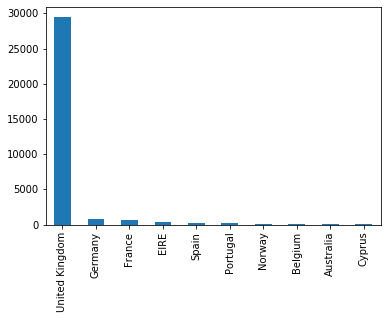

In [39]:
df.Country.value_counts()[:10].plot(kind='bar')

Text(0.5, 1, 'Heatmap of Data')

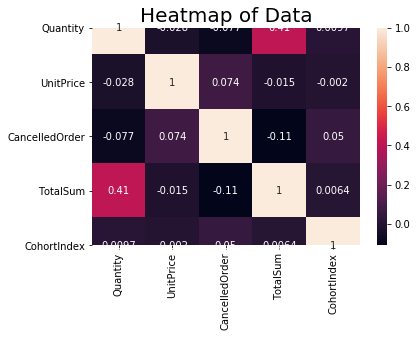

In [40]:
sns.heatmap(df.drop("CustomerID",axis=1).corr(),annot=True)
plt.title("Heatmap of Data",fontsize=20)

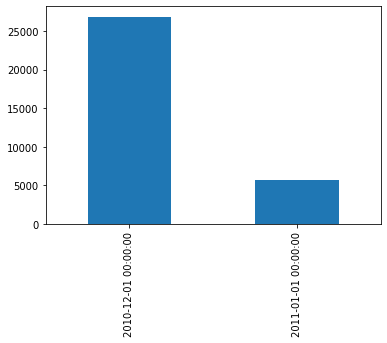

In [41]:
df.InvoiceMonth.value_counts().plot(kind='bar')

([<matplotlib.patches.Wedge at 0x234998e00b8>,
 [Text(-1.0960089282369339, 0.093618530350181, 'Not Cancelled'),
  Text(1.0960089249499834, -0.09361856883109229, 'Cancelled')],
 [Text(-0.5978230517656002, 0.05106465291828054, '97%'),
  Text(0.5978230499727182, -0.051064673907868514, '3%')])

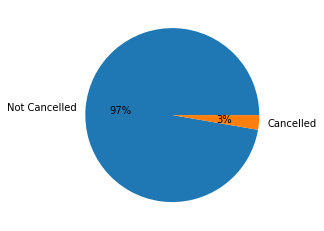

In [42]:
a=list(df.CancelledOrder)
labels = ["Not Cancelled","Cancelled"]
plt.pie([a.count(0),a.count(1)], labels=labels, autopct='%1.0f%%')

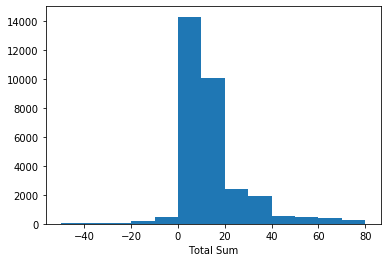

In [43]:
ig,ax = plt.subplots(1,1)
a = list(df.TotalSum)
ax.hist(a, bins = [-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80])
ax.set_xlabel('Total Sum')

plt.show()

In [44]:
earliest_date = df['Date'].min()
end_date = df['Date'].max()

print("Actual Start Date: {}, Actual End Date: {}".format(earliest_date, end_date))

Actual Start Date: 2010-12-01, Actual End Date: 2011-01-10


In [45]:
start_date = end_date - pd.to_timedelta(40, unit='d')
df_rfm = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

print("RFM Start Date: {}, RFM End Date: {}".format(
    df_rfm['Date'].min(), df_rfm['Date'].max()))

RFM Start Date: 2010-12-01, RFM End Date: 2011-01-10


In [46]:
snapshot_date = end_date + dt.timedelta(days=1)

df_rfm = df_rfm.groupby(['CustomerID']).agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'Invoice_No': 'count',
    'TotalSum': 'sum'})

df_rfm.rename(columns={'Date': 'Recency','Invoice_No': 'Frequency','TotalSum': 'MonetaryValue'}, inplace=True)
print(df_rfm.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12347.0          35         31         711.79
12348.0          26         17         892.80
12370.0          25         91        1868.02
12377.0          22         43        1001.52
12383.0          20         37         600.72


In [47]:
def get_quantile(df, column, start_n_quantiles, end_n_quantiles, step=1):

    category_label = range(start_n_quantiles, end_n_quantiles, step)
    
    quantiles = pd.qcut(df[column], q=abs(
        end_n_quantiles - start_n_quantiles), labels=category_label)

    df = df.assign(name=quantiles.values)

    new_column_name = column + '_Q'

    return df.rename(columns={"name": new_column_name})

In [48]:
df_rfm_quantile = df_rfm.copy()

df_rfm_quantile = get_quantile(df_rfm_quantile, 'Recency', 4, 0, -1)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'Frequency', 1, 5)
df_rfm_quantile = get_quantile(df_rfm_quantile, 'MonetaryValue', 1, 5)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q
CustomerID,,,,,,
12347.0,35,31,711.79,1,3,4
12348.0,26,17,892.80,3,2,4
12370.0,25,91,1868.02,3,4,4
12377.0,22,43,1001.52,3,4,4
12383.0,20,37,600.72,3,3,4


In [49]:
def join_rfm(x): 
    return str(x['Recency_Q']) + str(x['Frequency_Q']) + str(x['MonetaryValue_Q'])

In [50]:
df_rfm_quantile['RFM_Segment'] = df_rfm_quantile.apply(join_rfm, axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment
CustomerID,,,,,,,
12347.0,35,31,711.79,1,3,4,134
12348.0,26,17,892.80,3,2,4,324
12370.0,25,91,1868.02,3,4,4,344
12377.0,22,43,1001.52,3,4,4,344
12383.0,20,37,600.72,3,3,4,334


In [51]:
df_rfm_quantile['RFM_Score'] = df_rfm_quantile[['Recency_Q','Frequency_Q','MonetaryValue_Q']].sum(axis=1)

df_rfm_quantile.head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,35,31,711.79,1,3,4,134,8.0
12348.0,26,17,892.80,3,2,4,324,9.0
12370.0,25,91,1868.02,3,4,4,344,11.0
12377.0,22,43,1001.52,3,4,4,344,11.0
12383.0,20,37,600.72,3,3,4,334,10.0


In [52]:
df_rfm_quantile.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    80
311    56
111    52
322    42
211    39
122    39
333    39
344    37
434    27
433    26
dtype: int64

In [53]:
df_rfm_quantile[df_rfm_quantile['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,Recency_Q,Frequency_Q,MonetaryValue_Q,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12474.0,36,1,-34.00,1,1,1,111,3.0
12586.0,36,1,-17.00,1,1,1,111,3.0
12686.0,39,7,89.14,1,1,1,111,3.0
12808.0,36,7,129.40,1,1,1,111,3.0
12855.0,40,3,38.10,1,1,1,111,3.0


In [54]:
df_rfm_quantile.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                                          'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0          38.4       3.9          41.1    52
4.0          35.1       6.3         103.2    74
5.0          32.1       9.1         135.2   135
6.0          27.1      12.5         247.0   124
7.0          28.7      22.8         352.0   142
8.0          24.9      28.7         598.5   143
9.0          22.4      34.5         644.2   122
10.0         17.5      44.2         931.9   102
11.0         15.1      57.9        1453.1    75
12.0          4.9     108.4        2390.2    80

In [55]:
def segment_me(df):
    if df['RFM_Score'] > 10:
        return 'A Class'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 8):
        return 'B Class'
    elif (df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11):
        return 'C Class'
    else:
        return 'D Class'

In [56]:
df_rfm_quantile['Customer_Class'] = df_rfm_quantile.apply(segment_me, axis=1)

df_rfm_custom_segment = df_rfm_quantile.groupby('Customer_Class').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

df_rfm_custom_segment

Recency Frequency MonetaryValue      
                  mean      mean          mean count
Customer_Class                                      
A Class            9.8      83.9        1936.8   155
B Class           29.4      15.0         246.5   401
C Class           22.0      35.0         706.3   367
D Class           36.5       5.3          77.6   126

In [57]:
from scipy import stats
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: -0.6711126300542362, : SkewtestResult(statistic=-8.164028177828671, pvalue=3.2403326454149493e-16)
Frequency's: Skew: 5.928334408364296, : SkewtestResult(statistic=29.3364785725963, pvalue=3.5548517980923813e-189)
MonetaryValue's: Skew: 10.28216174678928, : SkewtestResult(statistic=35.35218615147393, pvalue=9.27973046453016e-274)


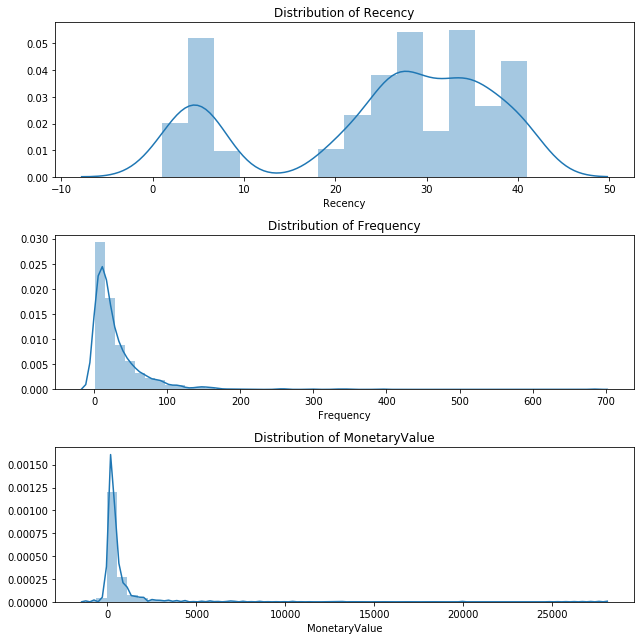

In [58]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [59]:
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,1049.000000,1049.000000,1049.000000
mean,24.755958,30.999047,636.856225
std,12.481495,42.645094,1458.809341
min,1.000000,1.000000,-1192.200000
25%,19.000000,8.000000,173.390000
50%,28.000000,18.000000,319.100000
75%,34.000000,39.000000,595.830000
max,41.000000,684.000000,27834.610000


In [60]:
df_rfm_log = df_rfm.copy()
df_rfm_log['MonetaryValue'] = (df_rfm_log['MonetaryValue'] - df_rfm_log['MonetaryValue'].min()) + 1

df_rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,1049.000000,1049.000000,1049.000000
mean,24.755958,30.999047,1830.056225
std,12.481495,42.645094,1458.809341
min,1.000000,1.000000,1.000000
25%,19.000000,8.000000,1366.590000
50%,28.000000,18.000000,1512.300000
75%,34.000000,39.000000,1789.030000
max,41.000000,684.000000,29027.810000


Recency's: Skew: -1.4292692592243799, : SkewtestResult(statistic=-14.470637606109106, pvalue=1.8574232959951036e-47)
Frequency's: Skew: -0.4447934950554939, : SkewtestResult(statistic=-5.667905785489064, pvalue=1.4455340824154598e-08)
MonetaryValue's: Skew: -3.4816488974227404, : SkewtestResult(statistic=-23.586420026240447, pvalue=5.3127501096393514e-123)


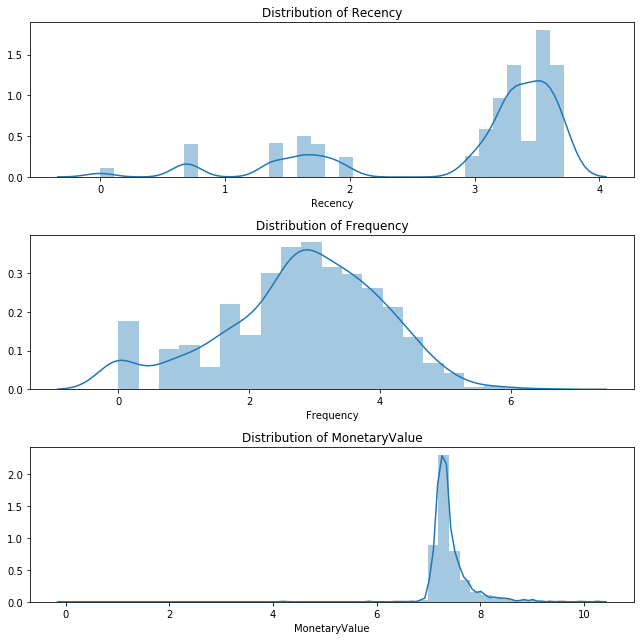

In [61]:
df_rfm_log = np.log(df_rfm_log)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)

df_rfm_normal.describe().round(3)

,Recency,Frequency,MonetaryValue
count,1049.000,1049.000,1049.000
mean,-0.000,0.000,-0.000
std,1.000,1.000,1.000
min,-3.200,-2.292,-16.930
25%,0.010,-0.590,-0.427
50%,0.432,0.073,-0.195
75%,0.644,0.706,0.189
max,0.848,3.050,6.558


In [63]:
from sklearn.metrics import silhouette_score


def optimal_kmeans(dataset, start=2, end=11):
    
    n_clu = []
    km_ss = []
    inertia = []

    for n_clusters in range(start, end):

     
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1]).round(3)))

        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sns.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.474, SS Delta: 0.0, Inertia: 2080.76, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.411, SS Delta: -0.063, Inertia: 1506.81, Inertia Delta: -573.95
No. Clusters: 4, Silhouette Score(SS): 0.442, SS Delta: 0.031, Inertia: 1201.23, Inertia Delta: -305.58
No. Clusters: 5, Silhouette Score(SS): 0.443, SS Delta: 0.001, Inertia: 932.01, Inertia Delta: -269.22
No. Clusters: 6, Silhouette Score(SS): 0.376, SS Delta: -0.067, Inertia: 780.35, Inertia Delta: -151.66
No. Clusters: 7, Silhouette Score(SS): 0.363, SS Delta: -0.013, Inertia: 675.52, Inertia Delta: -104.83
No. Clusters: 8, Silhouette Score(SS): 0.343, SS Delta: -0.02, Inertia: 614.89, Inertia Delta: -60.63
No. Clusters: 9, Silhouette Score(SS): 0.35, SS Delta: 0.007, Inertia: 561.43, Inertia Delta: -53.46
No. Clusters: 10, Silhouette Score(SS): 0.356, SS Delta: 0.006, Inertia: 511.75, Inertia Delta: -49.68


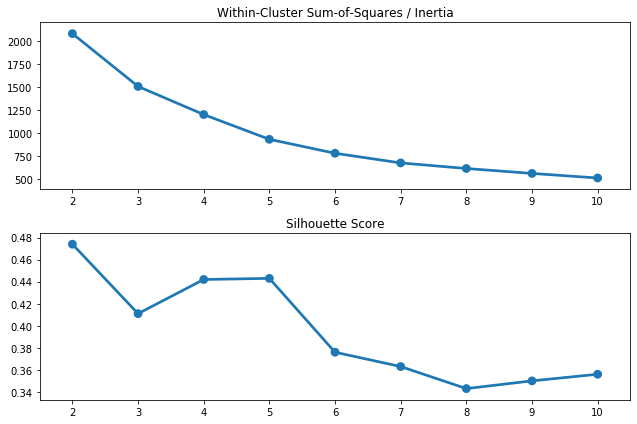

In [64]:
optimal_kmeans(df_rfm_normal)

In [65]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    cluster_labels = kmeans.labels_
        
    
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    

    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    

    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

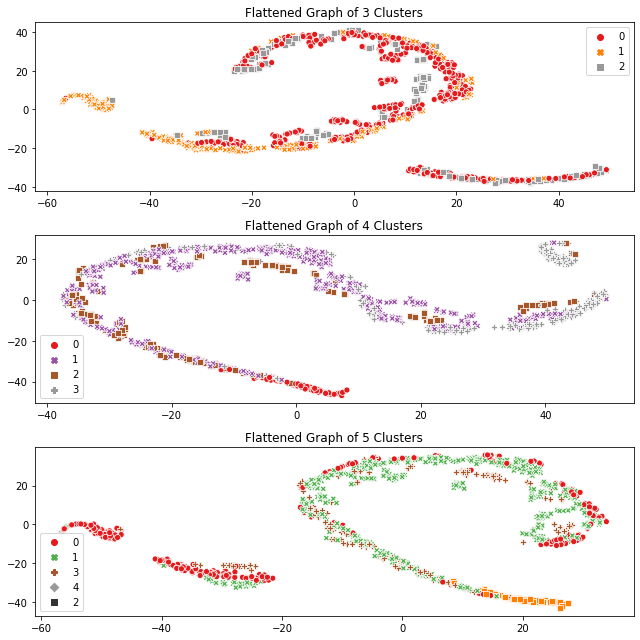

In [66]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_rfm_normal, 3, df_rfm)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_rfm_normal, 4, df_rfm)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_rfm_normal, 5, df_rfm)

plt.tight_layout()
plt.savefig('flattened.png', format='png', dpi=1000)

In [67]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': ['mean', 'count']
    }).round(0)
    
    return df_new

In [68]:
rfm_values(df_rfm_k3)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          31.0      35.0         544.0   544
1          30.0       5.0         165.0   277
2           5.0      53.0        1432.0   228

In [69]:
rfm_values(df_rfm_k4)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          12.0     115.0        4479.0    61
1          31.0      33.0         447.0   543
2           4.0      34.0         570.0   193
3          31.0       4.0         167.0   252

In [70]:
rfm_values(df_rfm_k5)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          31.0       4.0         188.0   268
1          31.0      34.0         451.0   526
2          12.0     115.0        4479.0    61
3           4.0      34.0         571.0   192
4          22.0       3.0       -1159.0     2

In [71]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df_rfm.index, 
                                       columns=df_rfm.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

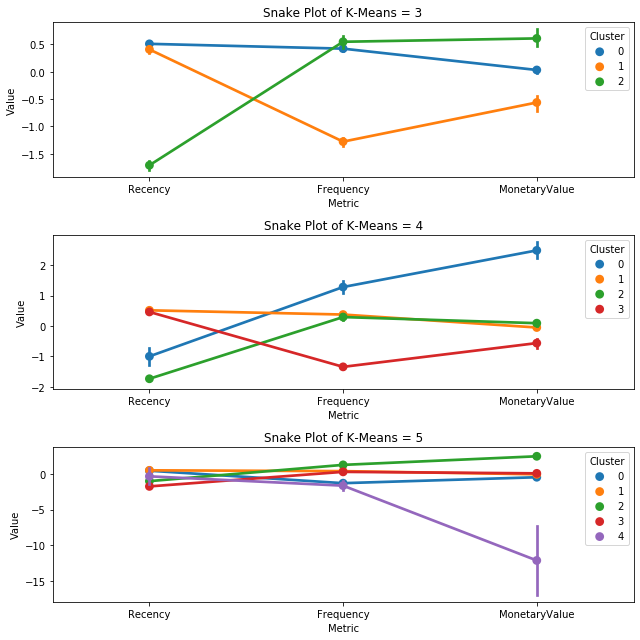

In [72]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(df_rfm_normal, df_rfm_k3, df_rfm)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_rfm_normal, df_rfm_k4, df_rfm)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(df_rfm_normal, df_rfm_k5, df_rfm)

plt.tight_layout()